<hr style="border: solid 3px Indigo;">

# <center><span style="font-family:Arial; font-style: italic;">Price optimization.</span></center>

<a id="2"></a> <br>
<div style="color:white;
           display:fill;
           border-radius:10px;
           background-color:red;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:1px">

<p style="padding: 16px;
              color:white;"> 
    <center>
    <span style="font-size:30px;">
    <b>
Data Understanding 
    </b>
        </span>
        </center>
</p>
</div>

load brazilian-ecommerce Dataset from kaggle olistbr/brazilian-ecommerce and but it in my drive "https://drive.google.com/drive/folders/1--GobL_76ZiIwwIERdoFoLuLWGIzJgcL?usp=sharing"

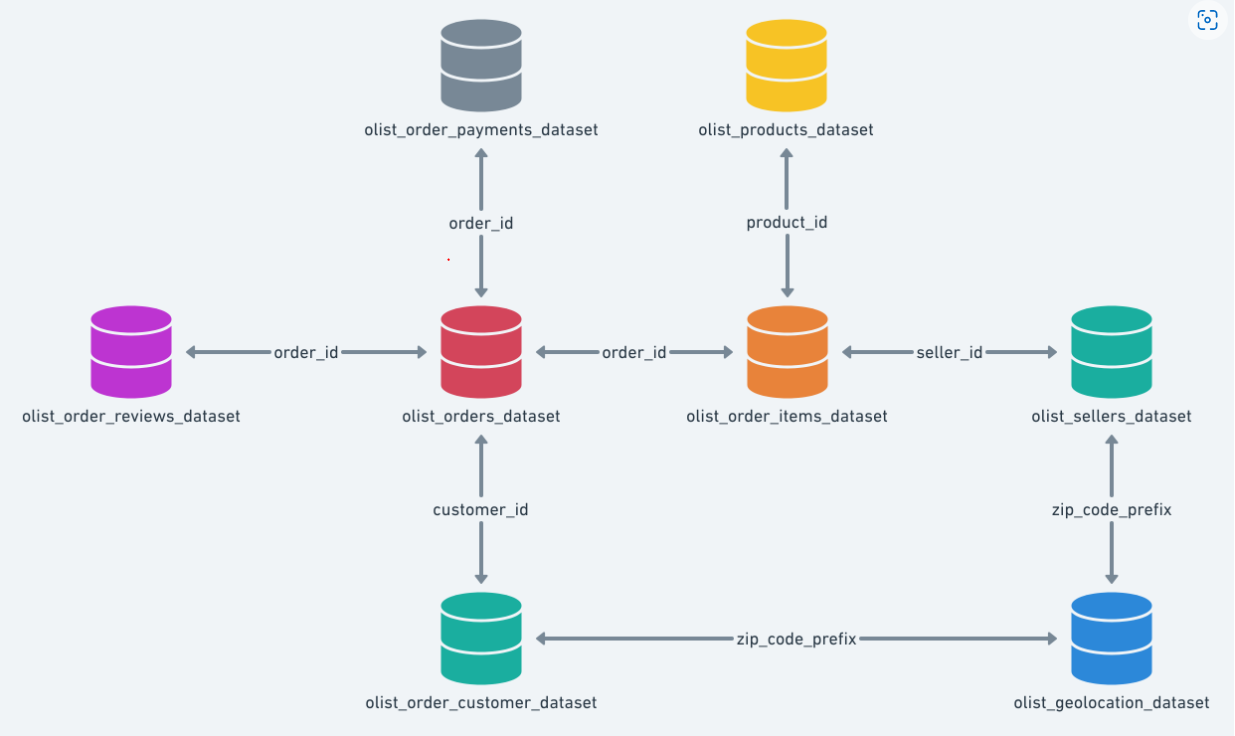

### import liberaries 

In [1]:
# pip install basemap
# pip install basemap-data-hires
#     !pip install minisom
#     !pip install docplex
#     !pip install cplex
#     !pip install smogn

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# from mpl_toolkits.basemap import Basemap
import requests 
import json 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import smogn
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC


from tqdm import tqdm

from minisom import MiniSom

from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
import timeit

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
#Example on R_Square and Adjusted R Square
# import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
# from cplex import Cplex
from docplex.mp.model import Model

from sklearn.linear_model import LinearRegression
from sklearn import svm

In [3]:
# from mpl_toolkits.basemap import Basemap

### load dataset 

In [4]:
df_item=pd.read_csv("content/drive/MyDrive/Data_set/brazilian-ecommerce/olist_order_items_dataset.csv")
df_pay=pd.read_csv("content/drive/MyDrive/Data_set/brazilian-ecommerce/olist_order_payments_dataset.csv")
df_rev=pd.read_csv("content/drive/MyDrive/Data_set/brazilian-ecommerce/olist_order_reviews_dataset.csv")
df_ord=pd.read_csv("content/drive/MyDrive/Data_set/brazilian-ecommerce/olist_orders_dataset.csv")
df_prod=pd.read_csv("content/drive/MyDrive/Data_set/brazilian-ecommerce/olist_products_dataset.csv")
df_loc=pd.read_csv("content/drive/MyDrive/Data_set/brazilian-ecommerce/olist_geolocation_dataset.csv")
df_prod_cat=pd.read_csv("content/drive/MyDrive/Data_set/brazilian-ecommerce/product_category_name_translation.csv")

### EDA

lat = df_loc['geolocation_lat']
lon = df_loc['geolocation_lng']

plt.figure(figsize=(10,10))

m = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
m.bluemarble()
m.drawmapboundary(fill_color='#46bcec') # Make your map into any style you like
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') # Make your map into any style you like
#m.drawcoastlines()
m.drawcountries()
m.scatter(lon, lat,zorder=10,alpha=0.5,color='tomato')

In [5]:
print("The shape of {} datafram is {}".format("df_item",df_item.shape)  )
print("The shape of {} datafram is {}".format("df_pay",df_pay.shape)  )
print("The shape of {} datafram is {}".format("df_rev",df_rev.shape)  )
print("The shape of {} datafram is {}".format("df_ord",df_ord.shape)  )
print("The shape of {} datafram is {}".format("df_prod",df_prod.shape)  )
print("The shape of {} datafram is {}".format("df_loc",df_loc.shape)  )
print("The shape of {} datafram is {}".format("df_prod_cat",df_prod_cat.shape)  )

The shape of df_item datafram is (112650, 7)
The shape of df_pay datafram is (103886, 5)
The shape of df_rev datafram is (100000, 7)
The shape of df_ord datafram is (99441, 8)
The shape of df_prod datafram is (32951, 9)
The shape of df_loc datafram is (1000163, 5)
The shape of df_prod_cat datafram is (71, 2)


In [6]:
df_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
df_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
df_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
df_prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
df_rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
df_prod_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
df_loc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Marge dataset files 

In [13]:
df_item=pd.merge(df_prod, df_item, on='product_id')

In [14]:
df_dataset=pd.merge(df_ord, df_item, on='order_id')

In [15]:
df_dataset=pd.merge(df_dataset, df_pay, on='order_id')

In [16]:
df_dataset=pd.merge(df_dataset, df_rev, on='order_id')

In [17]:

mapper=df_prod_cat.set_index('product_category_name').T.to_dict('list')

for l in mapper:
  for i in mapper[l]:
    x=''.join(i)
  mapper[l]=x

df_dataset['product_category_name']=df_dataset['product_category_name'].map(mapper) 
df_dataset['product_category_name']

0                    housewares
1                    housewares
2                    housewares
3                     perfumery
4                          auto
                  ...          
118310                     baby
118311        home_appliances_2
118312    computers_accessories
118313    computers_accessories
118314            health_beauty
Name: product_category_name, Length: 118315, dtype: object

In [18]:
df_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,housewares,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,housewares,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,housewares,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,perfumery,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,auto,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


### Add macroecoanomic factor

In [19]:
df = pd.read_csv('content/drive/MyDrive/Data_set/brazilian-ecommerce/Brazil Economy Indicator.csv') 
df_dataset['Year']=pd.to_datetime(df_dataset['order_purchase_timestamp']).dt.year
df_dataset[' Month']=pd.to_datetime(df_dataset['order_purchase_timestamp']).dt.month
df_dataset['Week']=pd.to_datetime(df_dataset['order_purchase_timestamp'],format='%Y-%m-%d').dt.week
df_dataset=pd.merge(df_dataset,df,on=['Year',' Month'])
df_dataset=df_dataset.sort_values(by=['order_purchase_timestamp'], ascending=True)

/var/folders/lp/c6tlpcxj1w7_5p4hy24ckc5w0000gn/T/ipykernel_14541/3661616687.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_dataset['Week']=pd.to_datetime(df_dataset['order_purchase_timestamp'],format='%Y-%m-%d').dt.week


## EDA after merge 

In [20]:
df_dataset.shape

(118315, 38)

In [21]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 118312 to 118314
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118315 non-null  object 
 1   customer_id                    118315 non-null  object 
 2   order_status                   118315 non-null  object 
 3   order_purchase_timestamp       118315 non-null  object 
 4   order_approved_at              118300 non-null  object 
 5   order_delivered_carrier_date   117061 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  118315 non-null  object 
 8   product_id                     118315 non-null  object 
 9   product_category_name          116581 non-null  object 
 10  product_name_lenght            116606 non-null  float64
 11  product_description_lenght     116606 non-null  float64
 12  product_photos_qty       

In [22]:
df_dataset.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
product_id                            0
product_category_name              1734
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
order_item_id                         0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0


In [23]:
missing = pd.concat([df_dataset.isna().sum().sort_values(ascending = False), 
                              ((df_dataset.isna().sum()/df_dataset.isna().count())*100).sort_values(ascending=False), 
                              df_dataset.dtypes], axis=1, keys=['NULL_number', 'Missing_precentage%','Type'])
missing[missing['NULL_number'] > 0]

,NULL_number,Missing_precentage%,Type
review_comment_title,104226,88.091958,object
review_comment_message,67650,57.177873,object
order_delivered_customer_date,2588,2.187381,object
product_category_name,1734,1.465579,object
product_photos_qty,1709,1.444449,float64
product_description_lenght,1709,1.444449,float64
product_name_lenght,1709,1.444449,float64
order_delivered_carrier_date,1254,1.059883,object
product_height_cm,20,0.016904,float64
product_length_cm,20,0.016904,float64


In [24]:
cat=df_dataset.groupby('review_score')['product_id'].count()
cat=cat.sort_values(ascending = False)
fig = px.bar(cat)
fig.show()


In [25]:
cat=df_dataset.groupby('product_category_name')['product_id'].count()
cat=cat.sort_values(ascending = False)
fig = px.bar(cat)
fig.show()
cat.head(10)

product_category_name
bed_bath_table           11990
health_beauty            10030
sports_leisure            9005
furniture_decor           8833
computers_accessories     8151
housewares                7380
watches_gifts             6213
telephony                 4726
garden_tools              4590
auto                      4400
Name: product_id, dtype: int64

In [26]:
cat=df_dataset.groupby('product_category_name')['order_id'].count()
cat=cat.sort_values(ascending = False)
fig = px.bar(cat)
fig.show()
cat.tail(10)

product_category_name
music                        40
diapers_and_hygiene          39
flowers                      33
fashion_sport                31
home_comfort_2               31
arts_and_craftmanship        24
la_cuisine                   16
cds_dvds_musicals            14
fashion_childrens_clothes     8
security_and_services         2
Name: order_id, dtype: int64

In [27]:
prod_order=df_dataset['product_id'].value_counts()
fig = px.bar(prod_order.head(50))
fig.show()
len(prod_order)

32951

In [28]:

df_dataset['Real Effective Exchange Rate']=df_dataset['Real Effective Exchange Rate'].apply(pd.to_numeric, errors='coerce')
df_dataset.columns = df_dataset.columns.str.replace(' ', '')

In [29]:
df_furniture_cat=df_dataset[df_dataset['product_category_name']=='furniture_decor']


In [30]:
df_furniture_cat.columns = df_furniture_cat.columns.str.replace(' ', '')


### groupby by time

In [31]:
col=['price','freight_value']
price_details= df_furniture_cat.groupby(['Year','Month','RealEffectiveExchangeRate','Unemployment'	,'ExchangeRateagainstUSD'])[col].sum().reset_index()
price_details=price_details.sort_values(by=['Year','Month'], ascending=True)
price_details.head(20)

,Year,Month,RealEffectiveExchangeRate,Unemployment,ExchangeRateagainstUSD,price,freight_value
0,2016,9,110.583,11.9,3.253,72.89,63.34
1,2016,10,114.213,11.9,3.185,6921.86,1469.46
2,2017,1,117.735,12.7,3.190,15161.90,3360.13
3,2017,2,119.768,13.3,3.106,22436.89,5583.14
4,2017,3,118.962,13.9,3.128,24971.64,6356.52
5,2017,4,117.507,13.7,3.139,22134.60,4574.97
6,2017,5,114.583,13.4,3.204,28002.26,6724.28
7,2017,6,110.438,13.1,3.295,17583.24,5236.58
8,2017,7,112.455,12.9,3.199,26817.39,6491.41
9,2017,8,112.559,12.7,3.148,37831.92,9545.75


In [32]:
price_details['DATE'] = pd.to_datetime(price_details[['Year','Month']].assign(DAY=15))

In [33]:
x = price_details.iloc[:,2:-1].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
price_details.iloc[:,2:-1] = pd.DataFrame(x_scaled)

In [34]:

fig = px.line(price_details, x="DATE",y= price_details.columns[2:],

              title='the sales value compare with brazilian macroecoanomic factor ')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [35]:
df_furniture_cat

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Year,Month,Week,Unemployment,ExchangeRateagainstUSD,RealEffectiveExchangeRate
118312,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,c1488892604e4ba5cff5b4eb4d595400,furniture_decor,...,NaN,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22 00:00:00,2016-11-15 16:00:34,2016,9,35,11.9,3.253,110.583
118311,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,f293394c72c9b5fafd7023301fc21fc2,furniture_decor,...,NaN,1 mes de atraso na entrega !!! ultima compra q...,2016-10-22 00:00:00,2016-11-15 16:00:34,2016,9,35,11.9,3.253,110.583
118254,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-03 22:06:03,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23 00:00:00,107177bf61755f05c604fe57e02467d6,furniture_decor,...,NaN,"Boa tarde o produto veio correto, porem a entr...",2016-11-01 00:00:00,2016-11-02 16:52:00,2016,10,40,11.9,3.185,114.213
118054,ef1b29b591d31d57c0d7337460dd83c9,dc607dc98d6a11d5d04d9f2a70aa6c34,delivered,2016-10-03 22:51:30,2016-10-04 10:28:19,2016-10-21 14:23:36,2016-11-01 15:14:45,2016-11-25 00:00:00,bfce5e847034e1fbbc1ed0bff6a372c7,furniture_decor,...,NaN,"Demora na entrega, detestei o atendimento e NU...",2016-11-02 00:00:00,2016-11-03 12:04:24,2016,10,40,11.9,3.185,114.213
118060,c3d9e402b6a0fbe2a5f7fc5b41117c38,5720a15d022c09d2634c71c80c8d4102,delivered,2016-10-04 10:16:04,2016-10-04 10:45:33,2016-10-28 15:34:00,2016-11-08 10:41:54,2016-12-08 00:00:00,817e1c2d22418c36386406ccacfa53e8,furniture_decor,...,NaN,NaN,2016-11-08 00:00:00,2016-11-09 14:05:17,2016,10,40,11.9,3.185,114.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17809,19ee088b8cb4afa401a748f8437135d1,85a0f9b7de741202663cd284bab26e93,delivered,2018-08-26 22:50:16,2018-08-26 23:04:24,2018-08-27 11:43:00,2018-08-30 16:57:40,2018-09-04 00:00:00,8af5b5f4f89849cc4dce36dee73dd9de,furniture_decor,...,NaN,NaN,2018-08-31 00:00:00,2018-08-31 21:18:57,2018,8,34,12.3,3.933,96.281
17810,19ee088b8cb4afa401a748f8437135d1,85a0f9b7de741202663cd284bab26e93,delivered,2018-08-26 22:50:16,2018-08-26 23:04:24,2018-08-27 11:43:00,2018-08-30 16:57:40,2018-09-04 00:00:00,8af5b5f4f89849cc4dce36dee73dd9de,furniture_decor,...,NaN,NaN,2018-08-31 00:00:00,2018-08-31 21:18:57,2018,8,34,12.3,3.933,96.281
17811,19ee088b8cb4afa401a748f8437135d1,85a0f9b7de741202663cd284bab26e93,delivered,2018-08-26 22:50:16,2018-08-26 23:04:24,2018-08-27 11:43:00,2018-08-30 16:57:40,2018-09-04 00:00:00,8af5b5f4f89849cc4dce36dee73dd9de,furniture_decor,...,NaN,NaN,2018-08-31 00:00:00,2018-08-31 21:18:57,2018,8,34,12.3,3.933,96.281
14529,9344079d5fbb7dd79af908b7eb667db7,be169d57b327a59f2db49cffdc6caf13,delivered,2018-08-28 15:11:49,2018-08-29 03:15:39,2018-08-29 09:47:00,2018-08-30 17:28:28,2018-09-03 00:00:00,3adde396ccd202b8fe21807c2b624f4c,furniture_decor,...,NaN,NaN,2018-08-31 00:00:00,2018-08-31 23:58:00,2018,8,35,12.3,3.933,96.281


### drop columns 

In [36]:
df_furniture_cat=df_furniture_cat.drop( ['customer_id','seller_id','review_id','order_item_id','review_comment_title', 'review_comment_message','review_creation_date','review_answer_timestamp','order_approved_at',	'order_delivered_carrier_date',	'order_delivered_customer_date',	'order_estimated_delivery_date','payment_sequential','order_id','order_status','product_category_name','product_name_lenght','product_description_lenght', 'product_photos_qty','shipping_limit_date','freight_value',	'payment_type'	,'payment_installments'	,'payment_value'],axis=1)

In [37]:
df_furniture_cat.shape

(8833, 14)

In [38]:
df_furniture_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8833 entries, 118312 to 18011
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   order_purchase_timestamp   8833 non-null   object 
 1   product_id                 8833 non-null   object 
 2   product_weight_g           8833 non-null   float64
 3   product_length_cm          8833 non-null   float64
 4   product_height_cm          8833 non-null   float64
 5   product_width_cm           8833 non-null   float64
 6   price                      8833 non-null   float64
 7   review_score               8833 non-null   int64  
 8   Year                       8833 non-null   int64  
 9   Month                      8833 non-null   int64  
 10  Week                       8833 non-null   int64  
 11  Unemployment               8833 non-null   float64
 12  ExchangeRateagainstUSD     8833 non-null   float64
 13  RealEffectiveExchangeRate  8833 non-null  

### EDA for sub data frame 

In [39]:
df_furniture_cat

,order_purchase_timestamp,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,Year,Month,Week,Unemployment,ExchangeRateagainstUSD,RealEffectiveExchangeRate
118312,2016-09-04 21:15:19,c1488892604e4ba5cff5b4eb4d595400,1400.0,32.0,6.0,28.0,39.99,1,2016,9,35,11.9,3.253,110.583
118311,2016-09-04 21:15:19,f293394c72c9b5fafd7023301fc21fc2,1800.0,32.0,6.0,28.0,32.90,1,2016,9,35,11.9,3.253,110.583
118254,2016-10-03 22:06:03,107177bf61755f05c604fe57e02467d6,2050.0,40.0,11.0,34.0,119.90,1,2016,10,40,11.9,3.185,114.213
118054,2016-10-03 22:51:30,bfce5e847034e1fbbc1ed0bff6a372c7,1800.0,40.0,8.0,30.0,74.90,1,2016,10,40,11.9,3.185,114.213
118060,2016-10-04 10:16:04,817e1c2d22418c36386406ccacfa53e8,2750.0,50.0,50.0,16.0,189.00,5,2016,10,40,11.9,3.185,114.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17809,2018-08-26 22:50:16,8af5b5f4f89849cc4dce36dee73dd9de,1000.0,35.0,10.0,35.0,75.00,5,2018,8,34,12.3,3.933,96.281
17810,2018-08-26 22:50:16,8af5b5f4f89849cc4dce36dee73dd9de,1000.0,35.0,10.0,35.0,75.00,5,2018,8,34,12.3,3.933,96.281
17811,2018-08-26 22:50:16,8af5b5f4f89849cc4dce36dee73dd9de,1000.0,35.0,10.0,35.0,75.00,5,2018,8,34,12.3,3.933,96.281
14529,2018-08-28 15:11:49,3adde396ccd202b8fe21807c2b624f4c,8400.0,50.0,20.0,36.0,169.00,4,2018,8,35,12.3,3.933,96.281


In [40]:
df_furniture_cat['product_id'].value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    536
b532349fe46b38fbc7bb3914c1bdae07    181
78efe838c04bbc568be034082200ac20    110
9ecadb84c81da840dbf3564378b586e9    106
eb8c629f70275fd1c4f809116cce1efc     95
                                   ... 
d58fee6a26472392dc2450375c7f935a      1
ee7aaf222ae5b180937c1ee17394225b      1
d57df0660328af2e535fa009f227d575      1
f2a4a74038882bf1adc8a466962559ec      1
3adde396ccd202b8fe21807c2b624f4c      1
Name: product_id, Length: 2657, dtype: int64

In [41]:
df_furniture_cat.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,Year,Month,Week,Unemployment,ExchangeRateagainstUSD,RealEffectiveExchangeRate
count,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000
mean,2676.178535,41.347107,17.776746,27.213065,87.455696,3.895279,2017.478886,5.946790,23.995811,12.700634,3.351029,108.122003
std,3885.361428,20.479780,13.587194,13.307339,88.999129,1.470811,0.517833,3.323394,14.503329,0.495621,0.243438,6.554967
min,2.000000,11.000000,2.000000,8.000000,4.900000,1.000000,2016.000000,1.000000,1.000000,11.900000,3.106000,96.281000
25%,650.000000,26.000000,8.000000,20.000000,39.900000,3.000000,2017.000000,3.000000,11.000000,12.300000,3.192000,102.668000
50%,1300.000000,36.000000,11.000000,25.000000,65.000000,5.000000,2017.000000,6.000000,22.000000,12.700000,3.263000,109.730000
75%,2600.000000,50.000000,27.000000,33.000000,99.900000,5.000000,2018.000000,8.000000,34.000000,13.000000,3.409000,112.455000
max,30000.000000,105.000000,100.000000,100.000000,1899.000000,5.000000,2018.000000,12.000000,52.000000,13.900000,3.933000,119.768000


In [42]:
df_furniture_cat['order_purchase_timestamp']=pd.to_datetime(df_furniture_cat['order_purchase_timestamp']).dt.date
df_furniture_cat['order_purchase_timestamp']

118312    2016-09-04
118311    2016-09-04
118254    2016-10-03
118054    2016-10-03
118060    2016-10-04
             ...    
17809     2018-08-26
17810     2018-08-26
17811     2018-08-26
14529     2018-08-28
18011     2018-08-28
Name: order_purchase_timestamp, Length: 8833, dtype: object

In [43]:
df_furniture_cat=df_furniture_cat.drop(['order_purchase_timestamp'],axis=1)



### calculate the sum of product in each month

In [44]:
df_furniture_cat['Quantity']=1
df_furniture_cat['Total_price']=df_furniture_cat['price']
total_price= df_furniture_cat.groupby(['Year','Month','product_id','product_weight_g','product_length_cm',	'product_height_cm'	,'product_width_cm'	,'price','review_score','Unemployment'	,'ExchangeRateagainstUSD',	'RealEffectiveExchangeRate'])[['Quantity','Total_price']].sum().reset_index()
total_price
#

,Year,Month,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,Unemployment,ExchangeRateagainstUSD,RealEffectiveExchangeRate,Quantity,Total_price
0,2016,9,c1488892604e4ba5cff5b4eb4d595400,1400.0,32.0,6.0,28.0,39.99,1,11.9,3.253,110.583,1,39.99
1,2016,9,f293394c72c9b5fafd7023301fc21fc2,1800.0,32.0,6.0,28.0,32.90,1,11.9,3.253,110.583,1,32.90
2,2016,10,0534940d69bf94dc61c0e722b4168235,2300.0,45.0,25.0,20.0,22.90,5,11.9,3.185,114.213,1,22.90
3,2016,10,107177bf61755f05c604fe57e02467d6,2050.0,40.0,11.0,34.0,119.90,1,11.9,3.185,114.213,1,119.90
4,2016,10,1097d069f21f90425a11bb3293ca1d87,1700.0,43.0,36.0,25.0,119.99,5,11.9,3.185,114.213,1,119.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,2018,8,fca62108387e25005784da2f551466a1,14600.0,84.0,8.0,84.0,249.90,5,12.3,3.933,96.281,1,249.90
5612,2018,8,fe1d68f123061329a6d3505c2b905566,150.0,35.0,10.0,25.0,9.99,5,12.3,3.933,96.281,1,9.99
5613,2018,8,fe9c4b2cf9c3adbaf3644880fb72254d,14000.0,32.0,100.0,32.0,416.00,5,12.3,3.933,96.281,1,416.00
5614,2018,8,fe9f815c71f1651837c0f6770e533db4,650.0,17.0,17.0,17.0,49.90,5,12.3,3.933,96.281,1,49.90


In [45]:
total_price.iloc[:,3:]

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,Unemployment,ExchangeRateagainstUSD,RealEffectiveExchangeRate,Quantity,Total_price
0,1400.0,32.0,6.0,28.0,39.99,1,11.9,3.253,110.583,1,39.99
1,1800.0,32.0,6.0,28.0,32.90,1,11.9,3.253,110.583,1,32.90
2,2300.0,45.0,25.0,20.0,22.90,5,11.9,3.185,114.213,1,22.90
3,2050.0,40.0,11.0,34.0,119.90,1,11.9,3.185,114.213,1,119.90
4,1700.0,43.0,36.0,25.0,119.99,5,11.9,3.185,114.213,1,119.99
...,...,...,...,...,...,...,...,...,...,...,...
5611,14600.0,84.0,8.0,84.0,249.90,5,12.3,3.933,96.281,1,249.90
5612,150.0,35.0,10.0,25.0,9.99,5,12.3,3.933,96.281,1,9.99
5613,14000.0,32.0,100.0,32.0,416.00,5,12.3,3.933,96.281,1,416.00
5614,650.0,17.0,17.0,17.0,49.90,5,12.3,3.933,96.281,1,49.90


## clutter to get substyles 

### Kmean_model

In [46]:

def kmeans_model(x, num_clusters):
  """
  INPUT:
  x: The training data
  num_clusters: The number of clusters

  OUTPUT:
  model: K-means model after fitting it with the training data

  """
  model = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)
  model.fit(x)
  return model

def plot_kmeans_elbow(x, max_clusters, features_name):
  """
  The function takes the training data and plot WCSS and silhouette versus the number of clusters

  INPUT:
  x: The training data
  max_clusters: The maximum number of clusters
  features_name: The name of used features that will appear in the title of the plot 

  """
  wcss = []
  s = []
  for i in range(1, max_clusters+1):
      model = kmeans_model(x, i)
      wcss.append(model.inertia_)
      if i>1:
        s.append(silhouette_score(x, model.labels_))

  fig = plt.figure(figsize=(15, 5))
  fig.suptitle('Elbow Method using ' + features_name + ' features')

  sub1 = plt.subplot(1, 2, 1)
  sub1.plot(range(1, max_clusters+1), wcss)
  sub1.set_xlabel('Number of clusters')
  sub1.set_ylabel('WCSS')

  sub2 = plt.subplot(1, 2, 2)
  sub2.plot(range(2, max_clusters+1), s)
  sub2.set_xlabel('Number of clusters')
  sub2.set_ylabel('silhouette')
  plt.show()


### em model

In [47]:
def em_model(x, num_components):
  """
  INPUT:
  x: The training data
  num_components: The number of mixture components.

  OUTPUT:
  model: Gaussian mixture model after fitting it with the training data

  """
  model = GaussianMixture(n_components=num_components,covariance_type='diag', random_state=0)
  model.fit(x)
  return model
def plot_em_elbow(x, max_components, features_name):
  """
  The function takes the training data and plot AIC, BIC and silhouette versus the number of components

  INPUT:
  x: The training data
  max_components: The maximum number of components 
  features_name: The name of used features that will appear in the title of the plot 

  """
  s = []
  n_components = np.arange(1, max_components+1)
  models = [em_model(x, n) for n in n_components]
  for i in range(2, max_components+1):
    model = em_model(x, i)
    labels = model.predict(x)
    s.append(silhouette_score(x, labels))

  fig = plt.figure(figsize=(15, 5))
  fig.suptitle('Elbow Method using ' + features_name + ' features')
  sub1 = plt.subplot(1, 2, 1)
  sub1.plot(n_components, [m.bic(x) for m in models], label='BIC')
  sub1.plot(n_components, [m.aic(x) for m in models], label='AIC')
  sub1.set_xlabel('Number of components')
  sub1.legend(loc='best')

  sub2 = plt.subplot(1, 2, 2)
  sub2.plot(range(2, max_components+1), s)
  sub2.set_xlabel('Number of clusters')
  sub2.set_ylabel('silhouette')
  plt.show()


### Hierarchical_clustering

In [48]:
def Hierarchical_clustering_vi(x,k):
    """
    Function : Hierarchical_clustering_vi
    Used to build Hierarchical cluster model and plot the dendrogram
    ---------------------------------
    Input : x the data it will be clutering
    k number of cluster it outcome from clustering methods 
    ---------------------------------
    Output : no thing 
    """
    dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
    plt.show()
    print('Elbow Method to determine the number of clusters to be formed:')
    hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
    Elbow_M = KElbowVisualizer(hc, k=k,timings=False,locate_elbow=False)
    Elbow_M.fit(x)
    Elbow_M.show()
    Elbow_M = KElbowVisualizer(hc, k=k,timings=False,metric='silhouette',locate_elbow=False)
    Elbow_M.fit(x)
    Elbow_M.show()
def Hierarchical_clustering_tr(x,k):
    """
    Function : Hierarchical_clustering
    Used to build Hierarchical cluster model and plot the dendrogram
    ---------------------------------
    Input : x the data it will be clutering
    k number of cluster it outcome from clustering methods 
    ---------------------------------
    Output : model 
    """
    # create clusters
    hc = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage = 'ward')
    hc.fit(x)
    return hc

### DBSCAN

In [49]:
def dbscan(X):
  s=[]
  for eps in tqdm(np.arange(0.3, 0.75, 0.05)):
    for ms in range(2, 16):
      db = DBSCAN(eps=eps, min_samples=ms)
      predLabels = db.fit_predict(X)
      n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
      if n_clusters > 1:
        score = silhouette_score(X, predLabels, random_state=0)
      else:
        score = 'None'
      print(score)


### plot cluster 

In [50]:
def plot_cluster(data,y,title=''):
  """
  Function : plot_cluster
  Used to plot the scatter plot after apply TSNE 
  ---------------------------------
  Input : 
  data 
  y
  title
  ---------------------------------
  Output : don't return
  """
  tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
  tsne_results = tsne.fit_transform(data)  
  plt.figure(figsize=(16,10))

  sns.scatterplot(
  x=tsne_results[:,0], y=tsne_results[:,1],
  hue=y
  )
  plt.xlabel("TSNE1",size=15)
  plt.ylabel("TSNE2",size=15)
  plt.title(title,size=20)
  plt.show()

## scale  

In [51]:
product=df_furniture_cat[["product_id","product_weight_g",	"product_length_cm",	"product_height_cm",	"product_width_cm"]]

In [52]:
sum(product.duplicated())

6176

In [53]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [54]:
product

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm
118312,c1488892604e4ba5cff5b4eb4d595400,1400.0,32.0,6.0,28.0
118311,f293394c72c9b5fafd7023301fc21fc2,1800.0,32.0,6.0,28.0
118254,107177bf61755f05c604fe57e02467d6,2050.0,40.0,11.0,34.0
118054,bfce5e847034e1fbbc1ed0bff6a372c7,1800.0,40.0,8.0,30.0
118060,817e1c2d22418c36386406ccacfa53e8,2750.0,50.0,50.0,16.0
...,...,...,...,...,...
17809,8af5b5f4f89849cc4dce36dee73dd9de,1000.0,35.0,10.0,35.0
17810,8af5b5f4f89849cc4dce36dee73dd9de,1000.0,35.0,10.0,35.0
17811,8af5b5f4f89849cc4dce36dee73dd9de,1000.0,35.0,10.0,35.0
14529,3adde396ccd202b8fe21807c2b624f4c,8400.0,50.0,20.0,36.0


In [55]:
sc_x = StandardScaler()
sc_product = sc_x.fit_transform(product.iloc[:,1:])

## apply cluter methods

plot_kmeans_elbow(sc_product,20,'sub style')

plot_em_elbow(sc_product,20,'sub style')

Hierarchical_clustering_vi(sc_product,20)

In [56]:
m=em_model(sc_product,6)
temp=m.predict(sc_product)
# plot_cluster(sc_product,temp,title='substyles')

In [57]:
m=kmeans_model(sc_product,12)
product['sub_style']=m.predict(sc_product)
# plot_cluster(sc_product,product['sub_style'],title='substyles')

/var/folders/lp/c6tlpcxj1w7_5p4hy24ckc5w0000gn/T/ipykernel_14541/1655053574.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
m=Hierarchical_clustering_tr(sc_product,8)
temp=m.labels_
# plot_cluster(sc_product,temp,title='substyles')

In [59]:
product['sub_style'].value_counts()

1     1643
0     1487
3     1296
4     1097
9      970
8      905
2      485
11     268
10     203
5      200
6      164
7      115
Name: sub_style, dtype: int64

In [60]:
product.shape
total_price.shape

(5616, 14)

## calculate avarage price an relative price 

In [61]:
# total_price = total_price.join( product[['product_id','sub_style']].set_index('product_id'), on='product_id')
# total_price = pd.merge( total_price.set_index('product_id'),product[['product_id','sub_style']].set_index('product_id'), on='product_id',how='left')
id_substyle_dic ={}
for _,p in product.iterrows():
    id_substyle_dic[p['product_id']] = p['sub_style']


In [62]:
substyles =[]
for _ , p in total_price.iterrows():
    substyles.append(id_substyle_dic[p['product_id']])
total_price['sub_style'] = substyles

In [63]:
total_price

,Year,Month,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,Unemployment,ExchangeRateagainstUSD,RealEffectiveExchangeRate,Quantity,Total_price,sub_style
0,2016,9,c1488892604e4ba5cff5b4eb4d595400,1400.0,32.0,6.0,28.0,39.99,1,11.9,3.253,110.583,1,39.99,3
1,2016,9,f293394c72c9b5fafd7023301fc21fc2,1800.0,32.0,6.0,28.0,32.90,1,11.9,3.253,110.583,1,32.90,3
2,2016,10,0534940d69bf94dc61c0e722b4168235,2300.0,45.0,25.0,20.0,22.90,5,11.9,3.185,114.213,1,22.90,0
3,2016,10,107177bf61755f05c604fe57e02467d6,2050.0,40.0,11.0,34.0,119.90,1,11.9,3.185,114.213,1,119.90,1
4,2016,10,1097d069f21f90425a11bb3293ca1d87,1700.0,43.0,36.0,25.0,119.99,5,11.9,3.185,114.213,1,119.99,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,2018,8,fca62108387e25005784da2f551466a1,14600.0,84.0,8.0,84.0,249.90,5,12.3,3.933,96.281,1,249.90,5
5612,2018,8,fe1d68f123061329a6d3505c2b905566,150.0,35.0,10.0,25.0,9.99,5,12.3,3.933,96.281,1,9.99,3
5613,2018,8,fe9c4b2cf9c3adbaf3644880fb72254d,14000.0,32.0,100.0,32.0,416.00,5,12.3,3.933,96.281,1,416.00,6
5614,2018,8,fe9f815c71f1651837c0f6770e533db4,650.0,17.0,17.0,17.0,49.90,5,12.3,3.933,96.281,1,49.90,9


In [64]:
average_price={}
for i in total_price['sub_style'].unique():
  t=total_price[total_price['sub_style']==i]
  average_price[i]=t['price'].mean()

In [65]:
average_price

{3: 61.303966421825805,
 0: 71.63484536082474,
 1: 108.50469240048251,
 8: 98.50818027210885,
 9: 54.40334733893556,
 4: 100.34050287356322,
 11: 80.32708571428572,
 5: 207.498427672956,
 6: 147.4250793650794,
 2: 182.75340298507464,
 7: 274.8898924731183,
 10: 98.08372093023254}

In [66]:
total_price['avg_price']=total_price['sub_style'].replace(average_price)
total_price['rel_price']=total_price['price']/total_price['avg_price']

In [67]:
total_price

,Year,Month,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,Unemployment,ExchangeRateagainstUSD,RealEffectiveExchangeRate,Quantity,Total_price,sub_style,avg_price,rel_price
0,2016,9,c1488892604e4ba5cff5b4eb4d595400,1400.0,32.0,6.0,28.0,39.99,1,11.9,3.253,110.583,1,39.99,3,61.303966,0.652323
1,2016,9,f293394c72c9b5fafd7023301fc21fc2,1800.0,32.0,6.0,28.0,32.90,1,11.9,3.253,110.583,1,32.90,3,61.303966,0.536670
2,2016,10,0534940d69bf94dc61c0e722b4168235,2300.0,45.0,25.0,20.0,22.90,5,11.9,3.185,114.213,1,22.90,0,71.634845,0.319677
3,2016,10,107177bf61755f05c604fe57e02467d6,2050.0,40.0,11.0,34.0,119.90,1,11.9,3.185,114.213,1,119.90,1,108.504692,1.105021
4,2016,10,1097d069f21f90425a11bb3293ca1d87,1700.0,43.0,36.0,25.0,119.99,5,11.9,3.185,114.213,1,119.99,8,98.508180,1.218071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,2018,8,fca62108387e25005784da2f551466a1,14600.0,84.0,8.0,84.0,249.90,5,12.3,3.933,96.281,1,249.90,5,207.498428,1.204346
5612,2018,8,fe1d68f123061329a6d3505c2b905566,150.0,35.0,10.0,25.0,9.99,5,12.3,3.933,96.281,1,9.99,3,61.303966,0.162958
5613,2018,8,fe9c4b2cf9c3adbaf3644880fb72254d,14000.0,32.0,100.0,32.0,416.00,5,12.3,3.933,96.281,1,416.00,6,147.425079,2.821772
5614,2018,8,fe9f815c71f1651837c0f6770e533db4,650.0,17.0,17.0,17.0,49.90,5,12.3,3.933,96.281,1,49.90,9,54.403347,0.917223


In [68]:
X=total_price[['price','avg_price',"rel_price",	"Unemployment",	"ExchangeRateagainstUSD","RealEffectiveExchangeRate"]]
y=total_price["Quantity"]

In [69]:
sc = StandardScaler()
sc_X = sc.fit_transform(X.to_numpy())
print(sc_X)

[[-0.56275945 -0.79259018 -0.43022581 -1.61994034 -0.38559305  0.32037684]
 [-0.63383519 -0.79259018 -0.57333859 -1.61994034 -0.38559305  0.32037684]
 [-0.73408306 -0.55745269 -0.84185254 -1.61994034 -0.65828901  0.85607251]
 ...
 [ 3.20666072  1.16758205  2.25431628 -0.8341925   2.34136647 -1.7902346 ]
 [-0.46341381 -0.94965273 -0.1024308  -0.8341925   2.34136647 -1.7902346 ]
 [-0.85448075 -0.94965273 -0.98973205 -0.8341925   2.34136647 -1.7902346 ]]


In [70]:
X_train,X_test,y_train,y_test = train_test_split(sc_X,y,test_size=0.2,random_state=42)

In [71]:
results={}

## predict_sales

### Randamforest

In [72]:
random_regr = RandomForestRegressor(max_depth=3, random_state=0)
random_regr.fit(X_train,y_train)


RandomForestRegressor(max_depth=3, random_state=0)

In [73]:
y_pred=random_regr.predict(X_test)
print(y_pred)
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

print(mean_absolute_error(y_test, y_pred))
#MAE: 26745.1109986
results['randam forest']=[mean_squared_error(y_test, y_pred),math.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test, y_pred)]

[1.76991075 1.72069692 1.56015641 ... 1.34614626 1.61618283 1.46820814]
2.464979360322082
1.5700252737844962
0.783211668808967


### Decision tree

In [74]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train,y_train)

[Text(0.5, 0.875, 'X[2] <= -0.381\nsquared_error = 4.231\nsamples = 4492\nvalue = 1.575'),
 Text(0.25, 0.625, 'X[2] <= -0.44\nsquared_error = 8.53\nsamples = 1887\nvalue = 1.862'),
 Text(0.125, 0.375, 'X[2] <= -0.633\nsquared_error = 2.1\nsamples = 1710\nvalue = 1.679'),
 Text(0.0625, 0.125, 'squared_error = 1.451\nsamples = 991\nvalue = 1.537'),
 Text(0.1875, 0.125, 'squared_error = 2.927\nsamples = 719\nvalue = 1.875'),
 Text(0.375, 0.375, 'X[2] <= -0.44\nsquared_error = 67.193\nsamples = 177\nvalue = 3.633'),
 Text(0.3125, 0.125, 'squared_error = 260.147\nsamples = 35\nvalue = 9.714'),
 Text(0.4375, 0.125, 'squared_error = 8.271\nsamples = 142\nvalue = 2.134'),
 Text(0.75, 0.625, 'X[2] <= -0.063\nsquared_error = 1.014\nsamples = 2605\nvalue = 1.368'),
 Text(0.625, 0.375, 'X[2] <= -0.098\nsquared_error = 1.595\nsamples = 890\nvalue = 1.529'),
 Text(0.5625, 0.125, 'squared_error = 1.267\nsamples = 830\nvalue = 1.487'),
 Text(0.6875, 0.125, 'squared_error = 5.77\nsamples = 60\nvalue = 

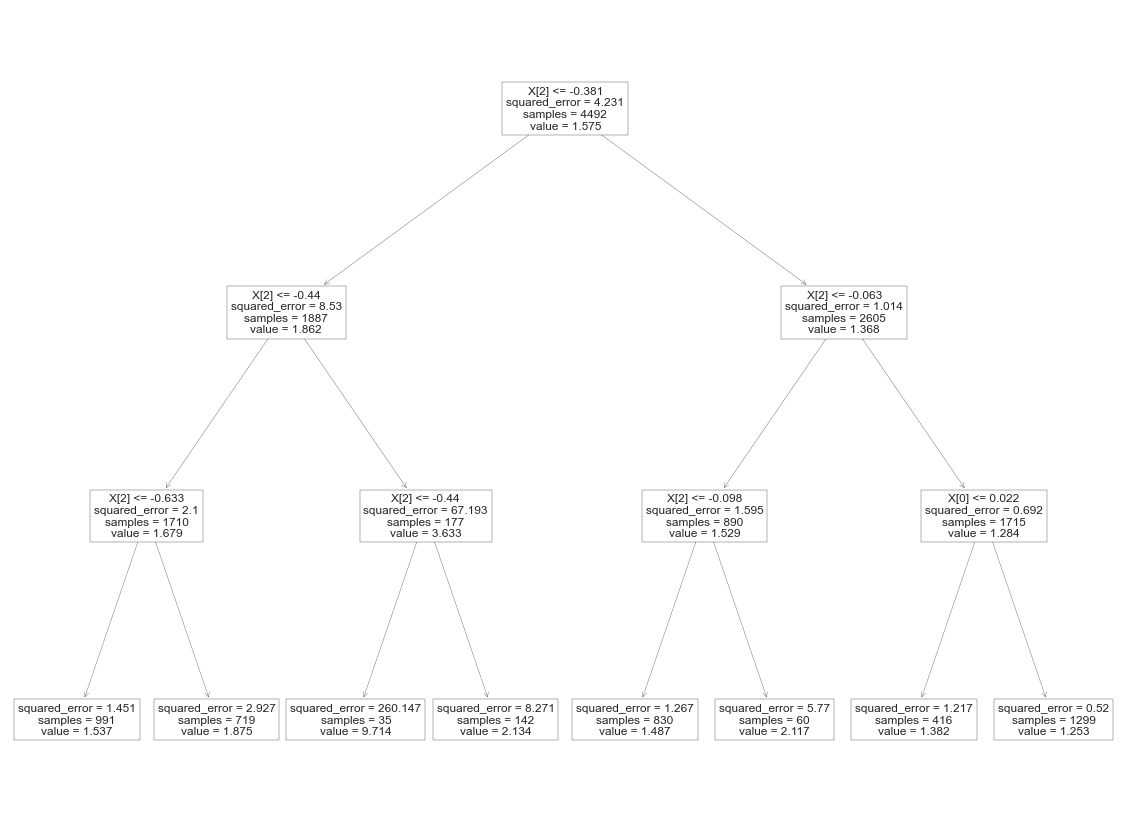

In [75]:
plt.figure(figsize=[20,15])
plot_tree(clf)

In [76]:
y_pred=clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

print(mean_absolute_error(y_test, y_pred))
#MAE: 26745.1109986
results['Decision tree']=[mean_squared_error(y_test, y_pred),math.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test, y_pred)]

2.508403426001027
1.5837939973370991
0.7949175436397223


In [77]:
def rounder(x):
    if (x-int(x) >= 0.5):
        return np.ceil(x)
    else:
        return np.floor(x)

### Bayesian Ridge Regression model

In [78]:
from sklearn import linear_model
regr = linear_model.BayesianRidge()
regr.fit(X_train,y_train)

BayesianRidge()

In [79]:
y_pred=regr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

print(mean_absolute_error(y_test, y_pred))
results['Bayesian Ridge']=[mean_squared_error(y_test, y_pred),math.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test, y_pred)]

2.905570093554313
1.7045732878214164
0.8031755702576056


### linear regression

In [80]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred=reg.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

print(mean_absolute_error(y_test, y_pred))
results['Linear regression']=[mean_squared_error(y_test, y_pred),math.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test, y_pred)]

2.901986412945762
1.7035217676759409
0.7993455043518702


### compare models 

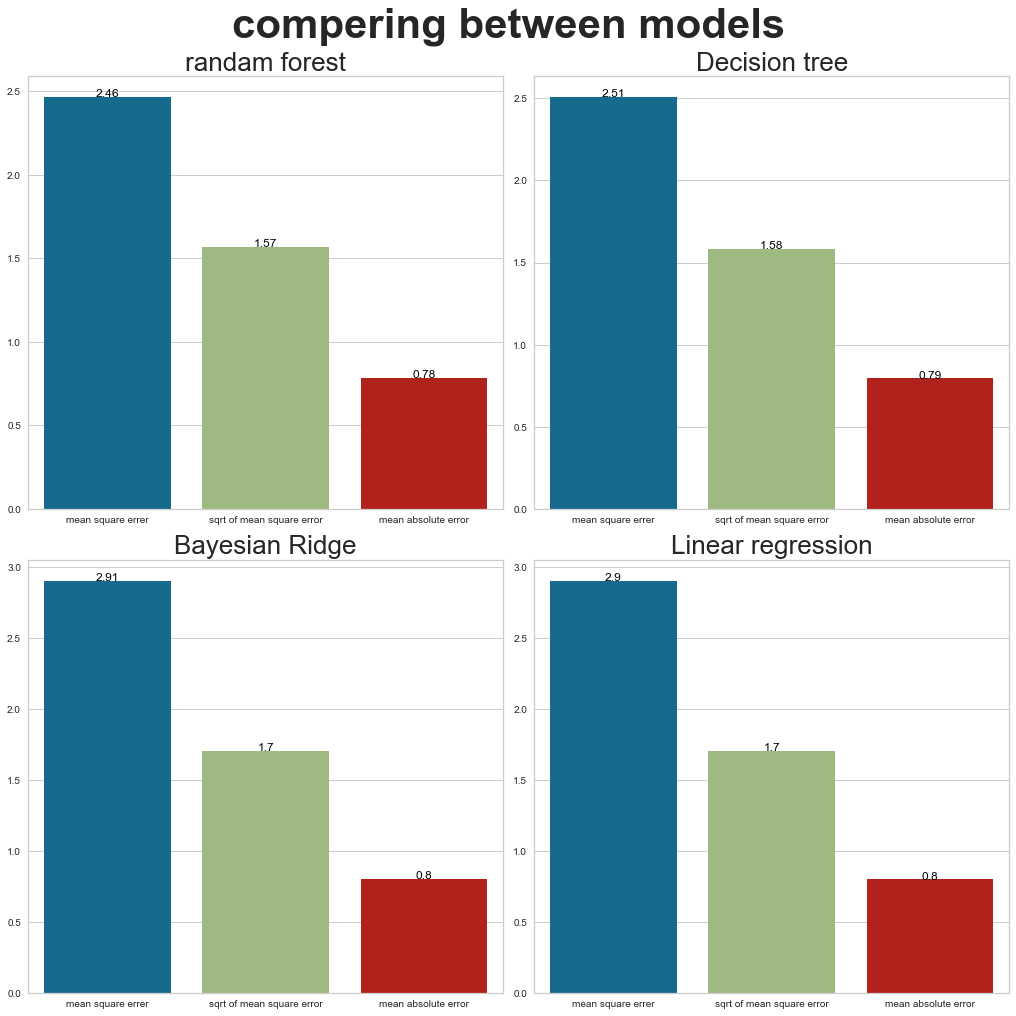

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

In [82]:
def plotCompare(results,x_ax):

  fig, axs = plt.subplots(nrows=2, ncols=2,
                          figsize=(14,14), constrained_layout=True)
  fig.suptitle('compering between models',fontweight="bold",size=42)

  for i, var in enumerate(results.keys()):
      row = i//2
      pos = i % 2
      plt.figure(figsize=(12,5))
      d=[]
      value=results[var]
      for v in value:
        d.append(v)
      
      
      axs[row, pos].set_title(var, size=26)
      g = sns.barplot(x=x_ax, y=d,ax=axs[row][pos])
      counter=0
      for va in value:
        v=round(va,2)
        g.text(counter,va,v, color='black', ha="center")
        counter+=1

plotCompare(results,['mean square errer','sqrt of mean square error','mean absolute error'])


### prediction

In [83]:
sub_style_df =total_price[total_price['sub_style']==4].reset_index(drop = True)

n_p_ss = sub_style_df.shape[0] # number_of_products_in_substyle

N_N_PriceMatrix= np.empty([n_p_ss,n_p_ss])
for index, row in sub_style_df.iterrows():
  range=row['price']*0.1
  min=row['price']-range
  max=row['price']+range
  # step= 2*range/n_p_ss
  revenueR=[]
  N_N_PriceMatrix[index]=np.linspace(start = min,stop = max,num = n_p_ss)
N_N_PriceMatrix = np.flipud( np.rot90(N_N_PriceMatrix))
N_N_PriceMatrix

array([[ 53.91      ,  21.51      , 133.2       , ...,  44.1       ,
        125.541     , 269.1       ],
       [ 53.92723741,  21.5168777 , 133.24258993, ...,  44.11410072,
        125.58114101, 269.18604317],
       [ 53.94447482,  21.5237554 , 133.28517986, ...,  44.12820144,
        125.62128201, 269.27208633],
       ...,
       [ 65.85552518,  26.2762446 , 162.71482014, ...,  53.87179856,
        153.35871799, 328.72791367],
       [ 65.87276259,  26.2831223 , 162.75741007, ...,  53.88589928,
        153.39885899, 328.81395683],
       [ 65.89      ,  26.29      , 162.8       , ...,  53.9       ,
        153.439     , 328.9       ]])

In [84]:
pred_quantities = np.empty([n_p_ss,n_p_ss])
for index,priceSet in enumerate(N_N_PriceMatrix):
  sub_style_df['price']=priceSet
  sub_style_df['avg_price'] = [sub_style_df['price'].mean()]*n_p_ss
  sub_style_df['rel_price']= sub_style_df['price']/sub_style_df['avg_price']
  features=sub_style_df[['price','avg_price',"rel_price",	"Unemployment",	"ExchangeRateagainstUSD","RealEffectiveExchangeRate"]]
  input_items=sc.transform(features.to_numpy())
  pred_quantity=random_regr.predict(input_items)
  pred_quantity=np.around(pred_quantity)
  pred_quantities[index] = pred_quantity

pred_quantities


array([[2., 2., 1., ..., 2., 1., 1.],
       [2., 2., 1., ..., 2., 1., 1.],
       [2., 2., 1., ..., 2., 1., 1.],
       ...,
       [2., 2., 1., ..., 2., 1., 1.],
       [2., 2., 1., ..., 2., 1., 1.],
       [2., 2., 1., ..., 2., 1., 1.]])

In [85]:
revenueM = np.multiply(pred_quantities,N_N_PriceMatrix)
revenueM

array([[107.82      ,  43.02      , 133.2       , ...,  88.2       ,
        125.541     , 269.1       ],
       [107.85447482,  43.0337554 , 133.24258993, ...,  88.22820144,
        125.58114101, 269.18604317],
       [107.88894964,  43.04751079, 133.28517986, ...,  88.25640288,
        125.62128201, 269.27208633],
       ...,
       [131.71105036,  52.55248921, 162.71482014, ..., 107.74359712,
        153.35871799, 328.72791367],
       [131.74552518,  52.5662446 , 162.75741007, ..., 107.77179856,
        153.39885899, 328.81395683],
       [131.78      ,  52.58      , 162.8       , ..., 107.8       ,
        153.439     , 328.9       ]])

In [86]:
total_price

,Year,Month,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,review_score,Unemployment,ExchangeRateagainstUSD,RealEffectiveExchangeRate,Quantity,Total_price,sub_style,avg_price,rel_price
0,2016,9,c1488892604e4ba5cff5b4eb4d595400,1400.0,32.0,6.0,28.0,39.99,1,11.9,3.253,110.583,1,39.99,3,61.303966,0.652323
1,2016,9,f293394c72c9b5fafd7023301fc21fc2,1800.0,32.0,6.0,28.0,32.90,1,11.9,3.253,110.583,1,32.90,3,61.303966,0.536670
2,2016,10,0534940d69bf94dc61c0e722b4168235,2300.0,45.0,25.0,20.0,22.90,5,11.9,3.185,114.213,1,22.90,0,71.634845,0.319677
3,2016,10,107177bf61755f05c604fe57e02467d6,2050.0,40.0,11.0,34.0,119.90,1,11.9,3.185,114.213,1,119.90,1,108.504692,1.105021
4,2016,10,1097d069f21f90425a11bb3293ca1d87,1700.0,43.0,36.0,25.0,119.99,5,11.9,3.185,114.213,1,119.99,8,98.508180,1.218071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,2018,8,fca62108387e25005784da2f551466a1,14600.0,84.0,8.0,84.0,249.90,5,12.3,3.933,96.281,1,249.90,5,207.498428,1.204346
5612,2018,8,fe1d68f123061329a6d3505c2b905566,150.0,35.0,10.0,25.0,9.99,5,12.3,3.933,96.281,1,9.99,3,61.303966,0.162958
5613,2018,8,fe9c4b2cf9c3adbaf3644880fb72254d,14000.0,32.0,100.0,32.0,416.00,5,12.3,3.933,96.281,1,416.00,6,147.425079,2.821772
5614,2018,8,fe9f815c71f1651837c0f6770e533db4,650.0,17.0,17.0,17.0,49.90,5,12.3,3.933,96.281,1,49.90,9,54.403347,0.917223


## optimization algorithm

In [87]:

#create an optimization model
opt_mod = Model(name="Linear Program")


#create the variables
variables = opt_mod.binary_var_list(n_p_ss)



#add constraints 
for priceSet in N_N_PriceMatrix:
    temp_sum = np.sum(priceSet)
    opt_mod.add_constraint(opt_mod.sum(variables[i]*priceSet[i] for i in np.arange(n_p_ss)) == temp_sum)

opt_mod.add_constraint(opt_mod.sum(variables[i] for i in np.arange(n_p_ss)) == 1)

obj_fn = opt_mod.sum(revenueM[i][j]*variables[i] for i in np.arange(n_p_ss) for j in np.arange(n_p_ss))
opt_mod.set_objective("max", obj_fn)


sol = opt_mod.solve()

# opt_mod.print_solution()
print(opt_mod.export_as_lp_string())


DOcplexException: Cannot solve model: no CPLEX runtime found.

In [ ]:

# solve the problem 
sol = opt_mod.solve(log_output=True)
print(opt_mod.export_as_lp_string())
opt_mod.print_solution()
# opt_mod.objective_value()
opt_mod.pprint_as_string()